In [77]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [78]:
import re
import mailbox
import csv

In [79]:
temp_rain_soil = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [80]:
temp_rain_soil.tail()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2023-08-23 00:00:00,11.0,0.0,50.77650,11.90
2023-08-23 01:00:00,11.0,0.0,50.82350,11.90
2023-08-23 02:00:00,11.0,0.0,50.82475,11.90
2023-08-23 03:00:00,11.0,0.0,50.85500,11.65
2023-08-23 04:00:00,10.0,0.0,50.95325,11.60


In [81]:
temp_rain_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44946 entries, 2018-07-07 11:00:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp       44946 non-null  float64
 1   Rain(mm)   44946 non-null  float64
 2   SoilMoist  44946 non-null  float64
 3   SoilTemp   44946 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


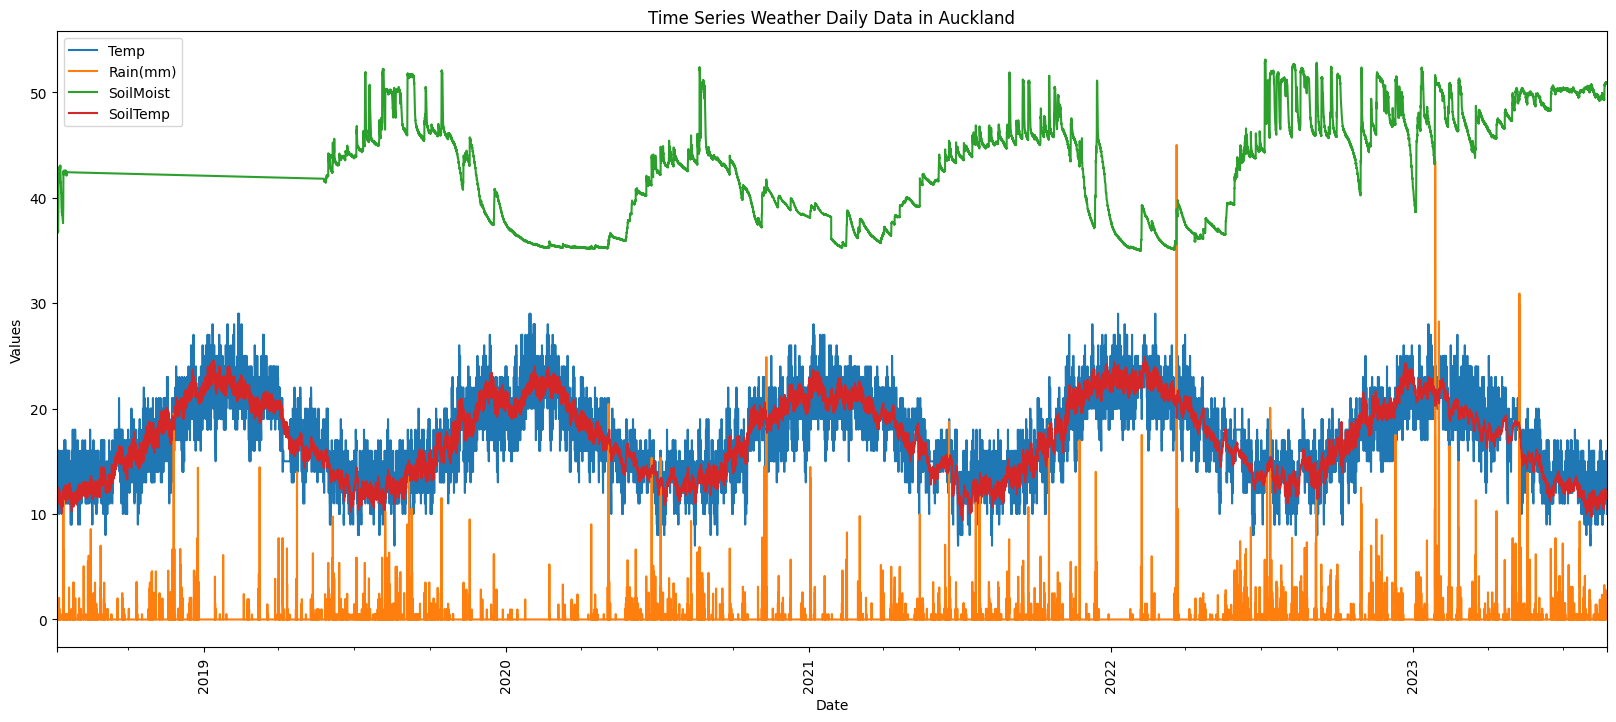

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
temp_rain_soil.plot(ax=ax)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Weather Daily Data in Auckland')

# Show the plot
plt.show()

In [83]:
daily_means  = temp_rain_soil.resample('D').mean()
monthly_means  = temp_rain_soil.resample('M').mean()
quater_means = temp_rain_soil.resample('Q').mean()
annual_means = temp_rain_soil.resample('A').mean()

print("Daily Means:\n", daily_means.head())
print("Monthly Means:\n", monthly_means.head())
print("Seasonal Means:\n", quater_means.head())
print("Annual Means:\n", annual_means.head())

Daily Means:
                             Temp  Rain(mm)  SoilMoist   SoilTemp
Timestamp (UTC+12:00)                                           
2018-07-07             14.615385  0.000000  37.340846  11.051923
2018-07-08             14.416667  0.168333  36.910969  11.355208
2018-07-09             14.125000  0.189167  40.972479  12.148958
2018-07-10             12.416667  0.252083  42.747975  11.923958
2018-07-11             12.583333  0.042083  42.726773  11.413542
Monthly Means:
                             Temp  Rain(mm)  SoilMoist   SoilTemp
Timestamp (UTC+12:00)                                           
2018-07-31             13.443124  0.162750  41.594260  11.656154
2018-08-31             13.530914  0.152742  42.356041  12.466767
2018-09-30             13.988889  0.069514  42.295490  14.204931
2018-10-31             15.521505  0.088790  42.234940  16.206915
2018-11-30             17.161111  0.140556  42.174389  18.405514
Seasonal Means:
                             Temp  Rain(mm) 

In [84]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

import warnings
warnings.filterwarnings('ignore')

In [85]:
# to calculate auto-corelation
acf(temp_rain_soil['Rain(mm)'])

array([1.        , 0.52340482, 0.35116711, 0.26083597, 0.19037535,
       0.15219257, 0.13970096, 0.11782222, 0.10480171, 0.10253506,
       0.10797931, 0.08571365, 0.06805813, 0.06241917, 0.04613482,
       0.03904565, 0.034827  , 0.02901448, 0.03006161, 0.03236588,
       0.02834157, 0.03183201, 0.03261875, 0.02111917, 0.01956601,
       0.01323522, 0.01627362, 0.01244495, 0.01266436, 0.0101639 ,
       0.0095776 , 0.00392477, 0.00958083, 0.02138793, 0.02025147,
       0.00837069, 0.00592432, 0.00972932, 0.0092601 , 0.0059503 ,
       0.00898588, 0.0077996 , 0.00850028, 0.01397356, 0.01338339,
       0.01620313, 0.02165113])

In [86]:
pacf_yw(temp_rain_soil['Rain(mm)'], nlags=60, method='mle')

array([ 1.00000000e+00,  5.23404817e-01,  1.06349121e-01,  5.70005250e-02,
        1.69597801e-02,  2.50349968e-02,  3.86751642e-02,  1.38582257e-02,
        1.76036326e-02,  2.60227396e-02,  3.43502699e-02, -5.91732709e-03,
       -3.41998600e-03,  9.16502268e-03, -7.41815170e-03,  1.30535233e-03,
        1.28743681e-03, -5.22990718e-04,  7.35037794e-03,  7.61451409e-03,
       -3.69134597e-04,  1.07154146e-02,  7.14104476e-03, -9.84070691e-03,
        3.08916989e-03, -5.01693834e-03,  7.62919221e-03, -2.97666982e-03,
        1.89957479e-03, -1.92726014e-03,  1.01772800e-03, -7.03569298e-03,
        8.07547736e-03,  1.85832096e-02,  1.42543444e-03, -1.28906673e-02,
       -1.28679019e-03,  7.29151724e-03,  1.37075082e-03, -3.96887564e-03,
        4.84834045e-03,  4.58084280e-04,  2.06798710e-03,  7.00894153e-03,
        1.34679355e-03,  7.51754773e-03,  1.01483092e-02,  5.87457860e-03,
       -4.64663990e-03, -7.66616629e-04,  9.45455330e-03,  1.21751799e-02,
        5.61578388e-03,  

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

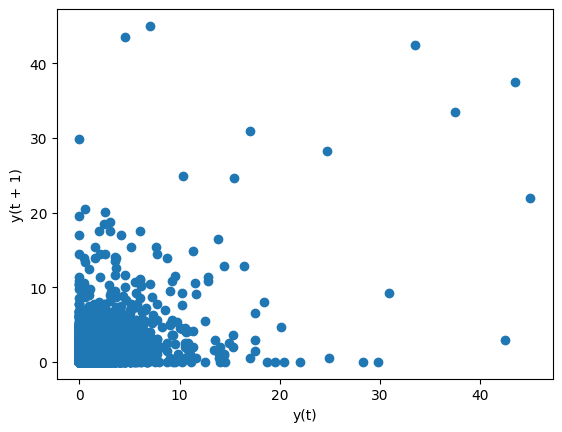

In [87]:
from pandas.plotting import lag_plot
lag_plot(temp_rain_soil['Rain(mm)'])

In [88]:
acf(temp_rain_soil['SoilMoist'])

array([1.        , 0.99962199, 0.99898584, 0.99823986, 0.99742009,
       0.99654091, 0.99560788, 0.99463377, 0.99362852, 0.99259023,
       0.9915235 , 0.99043997, 0.98934359, 0.98823837, 0.98712707,
       0.98601662, 0.98490917, 0.98380503, 0.98270721, 0.98161578,
       0.98052813, 0.97944654, 0.97836943, 0.97729186, 0.97620748,
       0.97511999, 0.97403907, 0.97296958, 0.97191761, 0.97088416,
       0.96986325, 0.9688537 , 0.96785727, 0.96687515, 0.96591022,
       0.96496788, 0.96404954, 0.96315485, 0.96228056, 0.96142812,
       0.96060059, 0.95979542, 0.95900839, 0.95823835, 0.95747515,
       0.95671289, 0.95595913])

In [89]:
pacf_yw(temp_rain_soil['SoilMoist'], nlags=60, method='mle')

array([ 1.00000000e+00,  9.99621988e-01, -3.41692924e-01, -3.28719745e-02,
       -4.40914914e-02, -3.33347220e-02, -3.20610848e-02, -1.48695400e-02,
       -1.05625888e-02, -2.08354367e-02, -1.07912552e-02,  1.76625399e-03,
       -2.90524145e-03,  4.24352740e-04,  6.52221631e-04,  8.23052007e-03,
        4.10430658e-03,  3.04622624e-03,  6.78234266e-03,  3.25443376e-03,
       -9.31160716e-04,  4.72172559e-03, -3.35223054e-04, -6.13622803e-03,
       -1.12659241e-02,  3.45978352e-04,  1.07815408e-02,  9.78259789e-03,
        1.57620011e-02,  1.13089541e-02,  1.18478301e-03,  4.44795138e-03,
        7.41010517e-03,  7.31672041e-03,  1.02681857e-02,  1.58278349e-02,
        1.27301471e-02,  1.08743616e-02,  6.11143779e-03,  1.11652341e-02,
        1.36611981e-02,  7.14017205e-03,  3.79152123e-03,  5.79422240e-03,
       -9.06346913e-03, -7.77504185e-03,  9.07543980e-03, -6.08610813e-03,
        5.76152497e-03,  1.37927858e-02, -5.10061646e-03,  7.81677115e-03,
        5.62864431e-03,  

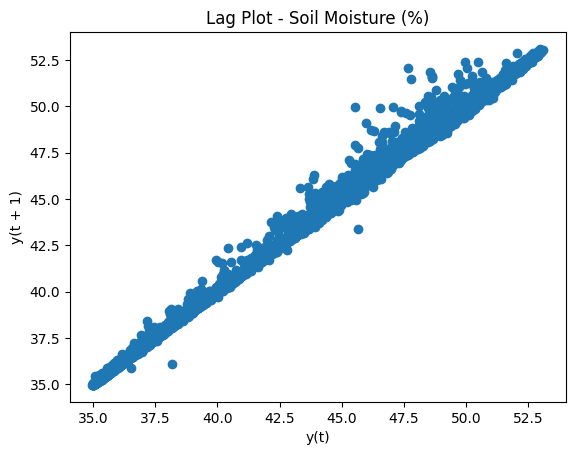

In [90]:
from pandas.plotting import lag_plot
lag_plot(temp_rain_soil['SoilMoist'])
plt.title('Lag Plot - Soil Moisture (%)')
plt.show()

### To explore the interplay between temperature, rainfall, and soil moisture more comprehensively
- analyze the cross-correlations between parameters

Lag with maximum correlation: -27 days


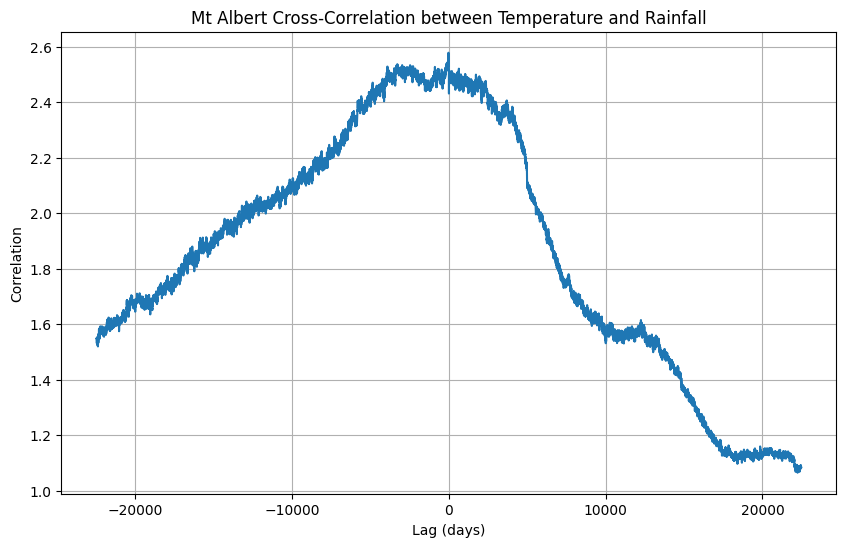

In [91]:
from scipy.signal import correlate

# Cross-correlation between temperature and rainfall
cross_corr_temp_rain = correlate(temp_rain_soil['Temp'], temp_rain_soil['Rain(mm)'], mode='same') / len(temp_rain_soil)

# Calculate the lag axis -  delay between two time series 
lag_axis = np.arange(-len(temp_rain_soil)//2, len(temp_rain_soil)//2)

max_corr_index = np.argmax(cross_corr_temp_rain)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_rain)
plt.title('Mt Albert Cross-Correlation between Temperature and Rainfall')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Lag with maximum correlation: -11 days


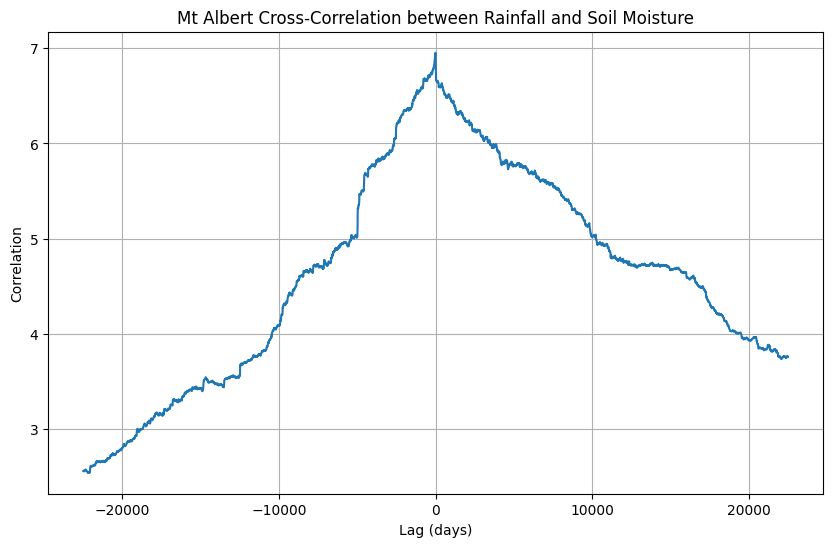

In [92]:
# Cross-Correlation between Rainfall and Soil Moisture:
from scipy.signal import correlate
import numpy as np
import matplotlib.pyplot as plt

# Calculate cross-correlation between rainfall and soil moisture
cross_corr_rain_soil = correlate(temp_rain_soil['Rain(mm)'], temp_rain_soil['SoilMoist'], mode='same') / len(temp_rain_soil)
n = len(cross_corr_rain_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_rain_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_rain_soil)
plt.title('Mt Albert Cross-Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Lag with maximum correlation: 0 days


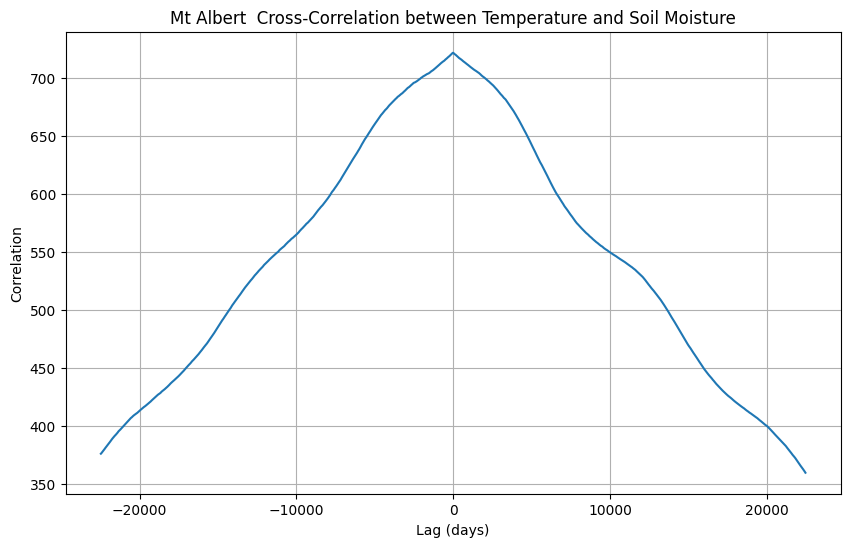

In [93]:
# Calculate cross-correlation between temperature and soil moisture

cross_corr_temp_soil = correlate(temp_rain_soil['Temp'], temp_rain_soil['SoilMoist'], mode='same') / len(temp_rain_soil)

n = len(cross_corr_temp_soil)

lag_axis = np.arange(-n//2, n//2)
max_corr_index = np.argmax(cross_corr_temp_soil)
max_corr_lag = lag_axis[max_corr_index]

print(f"Lag with maximum correlation: {max_corr_lag} days")

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lag_axis, cross_corr_temp_soil)
plt.title('Mt Albert  Cross-Correlation between Temperature and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

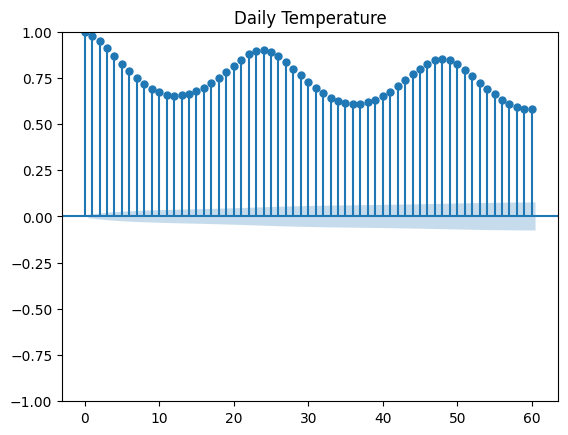

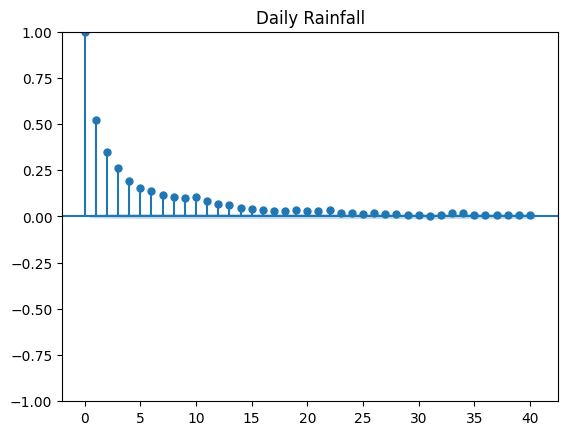

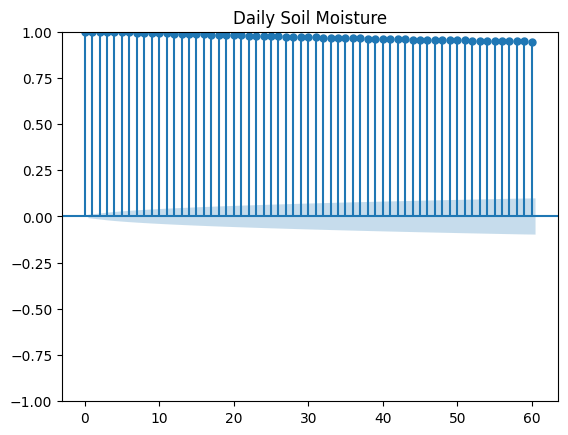

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(temp_rain_soil['Temp'], lags=60, title='Daily Temperature');
plot_acf(temp_rain_soil['Rain(mm)'], lags=40, title='Daily Rainfall');
plot_acf(temp_rain_soil['SoilMoist'], lags=60, title='Daily Soil Moisture');